In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.patches import Rectangle

In [3]:
pos_data = pd.read_csv('/Users/I566184/bachelorarbeit_coding/mesogeos/ml_tracks/a_fire_danger/a.danger_forecasting/positives.csv', parse_dates=['time'])
neg_data = pd.read_csv('/Users/I566184/bachelorarbeit_coding/mesogeos/ml_tracks/a_fire_danger/a.danger_forecasting/negatives.csv', parse_dates=['time'])

In [3]:
pos_data.columns

Index(['time', 'aspect', 'burned_areas', 'curvature', 'd2m', 'dem',
       'ignition_points', 'lai', 'lst_day', 'lst_night', 'ndvi', 'rh',
       'roads_distance', 'slope', 'smi', 'sp', 'ssrd', 't2m', 'tp',
       'wind_direction', 'wind_speed', 'x', 'y', 'lc_agriculture', 'lc_forest',
       'lc_grassland', 'lc_settlement', 'lc_shrubland', 'lc_sparse_vegetation',
       'lc_water_bodies', 'lc_wetland', 'population', 'burned_area_has',
       'time_idx', 'sample'],
      dtype='object')

In [23]:
pos_data['time'] = pd.to_datetime(pos_data['time'])

testing_data = pos_data[pos_data['time'].dt.year.isin([2021, 2022])]
testing_data

,time,aspect,burned_areas,curvature,d2m,dem,ignition_points,lai,lst_day,lst_night,...,lc_grassland,lc_settlement,lc_shrubland,lc_sparse_vegetation,lc_water_bodies,lc_wetland,population,burned_area_has,time_idx,sample
18642,2021-01-01,330.926760,0.0,27889.1110,274.86950,951.85754,0.0,0.8,276.74,273.46000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,187.0,12,621
18643,2021-01-02,330.926760,0.0,27889.1110,275.17615,951.85754,0.0,0.8,276.80,272.10000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,187.0,13,621
18644,2021-01-03,330.926760,0.0,27889.1110,275.38654,951.85754,0.0,0.9,NaN,NaN,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,187.0,14,621
18645,2021-01-04,330.926760,0.0,27889.1110,272.91480,951.85754,0.0,0.9,277.06,271.52000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,187.0,15,621
18646,2021-01-05,330.926760,0.0,27889.1110,272.56784,951.85754,0.0,0.9,276.24,270.25998,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,187.0,16,621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257065,2022-05-23,33.674683,0.0,5610.3027,282.39230,479.18665,0.0,0.6,309.30,285.94000,...,0.0,0.0,0.428136,0.077079,0.0,0.0,29.602198,32.0,25,8568
257066,2022-05-24,33.674683,0.0,5610.3027,281.75458,479.18665,0.0,0.6,312.10,287.86000,...,0.0,0.0,0.428136,0.077079,0.0,0.0,29.602198,32.0,26,8568
257067,2022-05-25,33.674683,0.0,5610.3027,287.14310,479.18665,0.0,0.5,308.58,289.18000,...,0.0,0.0,0.428136,0.077079,0.0,0.0,29.602198,32.0,27,8568
257068,2022-05-26,33.674683,0.0,5610.3027,283.08646,479.18665,0.0,0.5,317.08,291.22000,...,0.0,0.0,0.428136,0.077079,0.0,0.0,29.602198,32.0,28,8568


In [11]:

timeframe = pos_data[(pos_data['sample'] == 679)]
timeframe

,time,aspect,burned_areas,curvature,d2m,dem,ignition_points,lai,lst_day,lst_night,...,lc_grassland,lc_settlement,lc_shrubland,lc_sparse_vegetation,lc_water_bodies,lc_wetland,population,burned_area_has,time_idx,sample
20370,2022-06-17,156.99074,0.0,1254.0588,288.08890,795.34845,0.0,1.1,NaN,NaN,...,0.0,0.0,0.378616,0.0,0.0,0.0,2.20923,32528.0,0,679
20371,2022-06-18,156.99074,0.0,1254.0588,286.47210,795.34845,0.0,1.0,NaN,NaN,...,0.0,0.0,0.378616,0.0,0.0,0.0,2.20923,32528.0,1,679
20372,2022-06-19,156.99074,0.0,1254.0588,284.17612,795.34845,0.0,1.0,NaN,NaN,...,0.0,0.0,0.378616,0.0,0.0,0.0,2.20923,32528.0,2,679
20373,2022-06-20,156.99074,0.0,1254.0588,280.76517,795.34845,0.0,1.0,NaN,282.84000,...,0.0,0.0,0.378616,0.0,0.0,0.0,2.20923,32528.0,3,679
20374,2022-06-21,156.99074,0.0,1254.0588,283.72662,795.34845,0.0,1.0,299.30000,NaN,...,0.0,0.0,0.378616,0.0,0.0,0.0,2.20923,32528.0,4,679
20375,2022-06-22,156.99074,0.0,1254.0588,283.94492,795.34845,0.0,1.0,NaN,NaN,...,0.0,0.0,0.378616,0.0,0.0,0.0,2.20923,32528.0,5,679
20376,2022-06-23,156.99074,0.0,1254.0588,283.08002,795.34845,0.0,1.0,NaN,NaN,...,0.0,0.0,0.378616,0.0,0.0,0.0,2.20923,32528.0,6,679
20377,2022-06-24,156.99074,0.0,1254.0588,283.89127,795.34845,0.0,1.0,NaN,NaN,...,0.0,0.0,0.378616,0.0,0.0,0.0,2.20923,32528.0,7,679
20378,2022-06-25,156.99074,0.0,1254.0588,279.18622,795.34845,0.0,1.0,306.12000,282.30000,...,0.0,0.0,0.378616,0.0,0.0,0.0,2.20923,32528.0,8,679
20379,2022-06-26,156.99074,0.0,1254.0588,278.61557,795.34845,0.0,0.8,296.74000,285.13998,...,0.0,0.0,0.378616,0.0,0.0,0.0,2.20923,32528.0,9,679


/var/folders/g1/f89bp0710rxg50s3nbjcl19m0000gn/T/ipykernel_56928/2773126139.py:33: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  rect = Rectangle((i, i), 1, 1, fill=True, color='lightgrey', hatch='///',


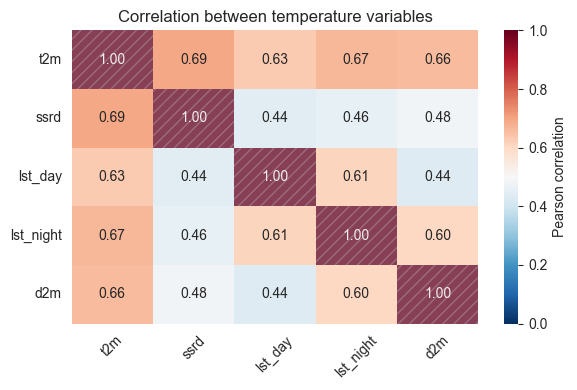

,t2m,ssrd,lst_day,lst_night,d2m
t2m,1.000000,0.693114,0.629359,0.667839,0.658219
ssrd,0.693114,1.000000,0.442090,0.458555,0.482107
lst_day,0.629359,0.442090,1.000000,0.611911,0.435815
lst_night,0.667839,0.458555,0.611911,1.000000,0.603267
d2m,0.658219,0.482107,0.435815,0.603267,1.000000


In [10]:
def analyze_temperature_correlation(df: pd.DataFrame, temp_vars: list) -> pd.DataFrame:
    """
    Computes and plots correlation between temperature-related variables.
    Fills NaN values with column-wise mean before computing correlation.

    Parameters:
        df (pd.DataFrame): Input dataframe with temperature variables.
        temp_vars (List[str]): List of temperature variable names.

    Returns:
        pd.DataFrame: Correlation matrix between specified temperature variables.
    """
    # Only use temperature variables and fill NaNs with column mean
    df_temp = df[temp_vars].copy()
    df_temp = df_temp.fillna(df_temp.mean())

    # Compute correlation matrix
    corr_matrix = df_temp.corr()

    # Plot heatmap
    plt.figure(figsize=(6, 4))
    red_white = LinearSegmentedColormap.from_list("red_white", ["white", "#8C0015"])
    red_to_lightblue = LinearSegmentedColormap.from_list(
        "red_to_lightblue",
        ["#ADD8E6", "#BF272A"])
    red_to_lightblue_soft = LinearSegmentedColormap.from_list(
        "red_to_lightblue_soft",
        ["#D2EEFF", "#DA9CA0", "#9D0126"]
    )
    ax = sns.heatmap(corr_matrix, annot=True, cmap="RdBu_r", vmin=0, vmax=1, fmt=".2f", cbar_kws={'label': 'Pearson correlation'})

    for i in range(len(corr_matrix)):
        rect = Rectangle((i, i), 1, 1, fill=True, color='lightgrey', hatch='///',
                     edgecolor='black', lw=0.0, zorder=3, alpha=0.3)
        ax.add_patch(rect)

    plt.title("Correlation between temperature variables")
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.savefig('/Users/I566184/Library/Mobile Documents/com~apple~CloudDocs/Uni/Wirtschaftsinformatik KIT/Semester6/Bachlorarbeit/Graphics/Results/Correlation_temperature1.png', dpi=300)
    
    plt.show()

    return corr_matrix

analyze_temperature_correlation(pos_data, ['t2m', 'ssrd', 'lst_day', 'lst_night', 'd2m'])

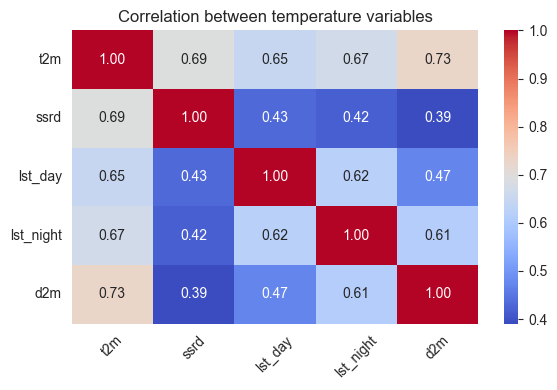

,t2m,ssrd,lst_day,lst_night,d2m
t2m,1.000000,0.694401,0.646311,0.667348,0.728210
ssrd,0.694401,1.000000,0.432502,0.417513,0.390501
lst_day,0.646311,0.432502,1.000000,0.619876,0.472403
lst_night,0.667348,0.417513,0.619876,1.000000,0.612032
d2m,0.728210,0.390501,0.472403,0.612032,1.000000


In [39]:
analyze_temperature_correlation(neg_data, ['t2m', 'ssrd', 'lst_day', 'lst_night', 'd2m'])

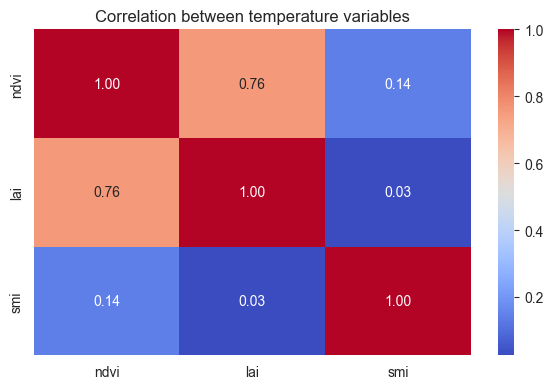

,ndvi,lai,smi
ndvi,1.000000,0.755141,0.143127
lai,0.755141,1.000000,0.025767
smi,0.143127,0.025767,1.000000


In [33]:
analyze_temperature_correlation(pos_data, ['ndvi', 'lai', 'smi'])

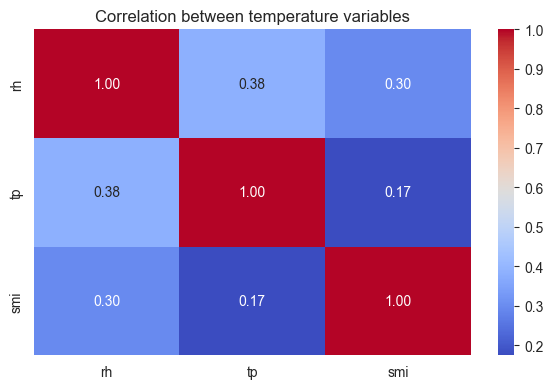

,rh,tp,smi
rh,1.000000,0.382198,0.296822
tp,0.382198,1.000000,0.174374
smi,0.296822,0.174374,1.000000


In [35]:
analyze_temperature_correlation(pos_data, ['rh', 'tp', 'smi'])

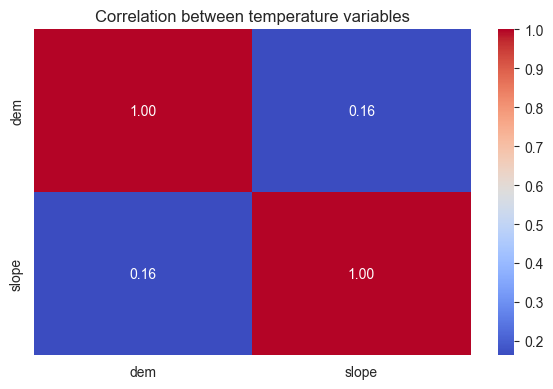

,dem,slope
dem,1.000000,0.162965
slope,0.162965,1.000000


In [37]:
analyze_temperature_correlation(pos_data, ['dem', 'slope'])

In [16]:
continuous_vars_full = ['t2m', 'd2m', 'lst_day', 'lst_night', 'rh', 'tp', 'ssrd', 'wind_speed', 'wind_direction', 'ndvi', 'lai', 'smi', 'sp']
continuous_vars_temp = ['t2m', 'd2m', 'lst_day', 'lst_night']
continuous_vars = ['t2m', 'd2m', 'lst_day', 'lst_night', 'rh', 'tp', 'wind_speed', 'ndvi', 'lai', 'smi']

#time_idx = 0 represents 30 days before the fire
#time_idx = 29 represents 1 day before the fire
def scaled_timeframe(timeframe, continuous_vars):
    scaler = MinMaxScaler()
    scaled_timeframe = pd.DataFrame(scaler.fit_transform(timeframe[continuous_vars]), columns=continuous_vars)
    scaled_timeframe['row_id'] = range(len(scaled_timeframe))
    return scaled_timeframe

def lineplot_timeframe(timeframe, continuous_vars):
    plt.figure(figsize=(14, 7))
    for var in continuous_vars:
        if var in scaled_timeframe.columns:
            plt.plot(timeframe['sample'], timeframe[var], label=var)

    plt.title("Flow of continuous Mesogeos variables")
    plt.xlabel("Tage vor Feuer")
    plt.ylabel("Wert")
    plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0))
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def lineplot_separat(timeframe, continuous_vars):
    n = len(continuous_vars)
    fig, axes = plt.subplots(n, 1, figsize=(12, 3 * n), sharex=True)
    x = timeframe['sample']
    
    for i, var in enumerate(continuous_vars):
        y = timeframe[var]
        axes[i].plot(x, y, label='Wert')
    
        mask = ~np.isnan(y)
        x_valid = x[mask]
        y_valid = y[mask]
    
        if len(x_valid) > 1:
            coeffs = np.polyfit(x_valid, y_valid, deg=1)
            trend = np.poly1d(coeffs)
            axes[i].plot(x_valid, trend(x_valid), 'r--', label='Trend')
            axes[i].set_ylabel(var)
            axes[i].grid(True)
            axes[i].legend(loc='upper right')

    axes[-1].set_xlabel("Days")
    plt.tight_layout()
    plt.show()

def heatmap_timeframe(timeframe, continuous_vars):
    heatmap_df = timeframe[continuous_vars].copy()
    heatmap_df['row_id'] = timeframe['row_id'].values
    heatmap_df = heatmap_df.set_index('row_id')

    plt.figure(figsize=(12, len(continuous_vars) * 0.5 + 3))
    sns.heatmap(heatmap_df.T, cmap="coolwarm", cbar=True) #or use viridis
    plt.title("Heatmap: Flow of continuous variables (30 days before fire)")
    plt.xlabel("Days")
    plt.ylabel("Mesogeos Variables")
    plt.tight_layout()
    plt.show()

### Plot biggest Fire
Ignition date: 2022-07-17
Country: Spain

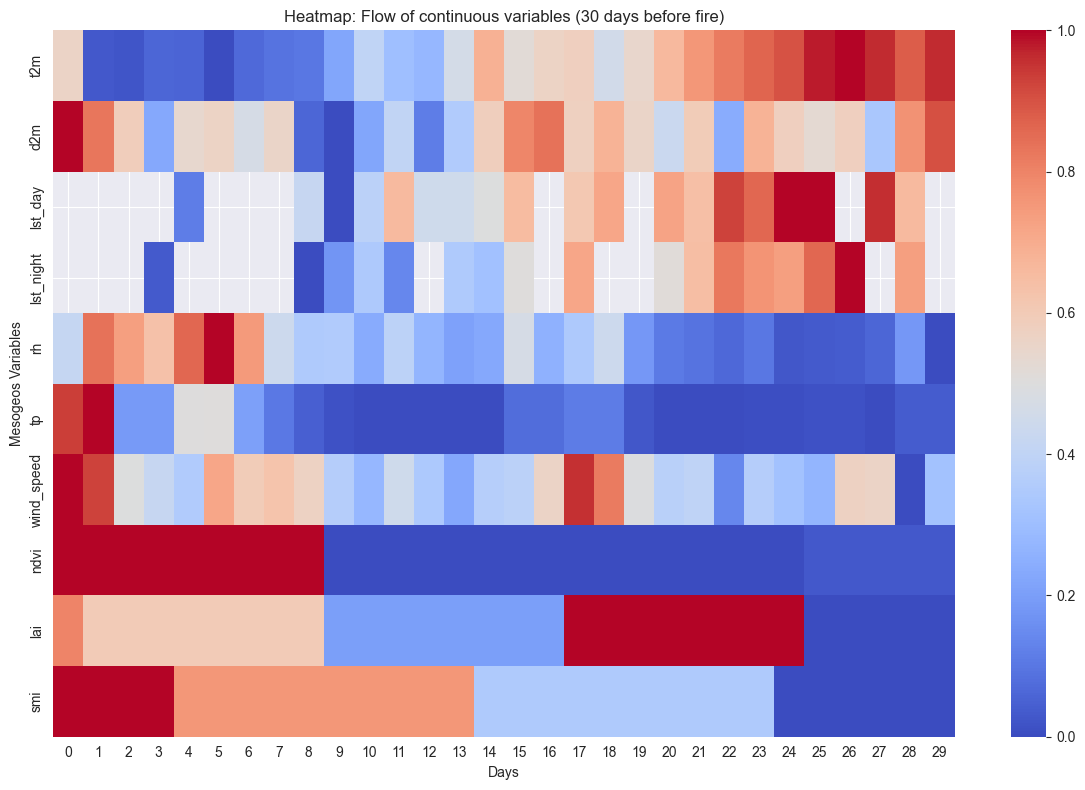

In [14]:
scaledTimeframe = scaled_timeframe(timeframe, continuous_vars)
heatmap_timeframe(scaledTimeframe, continuous_vars)

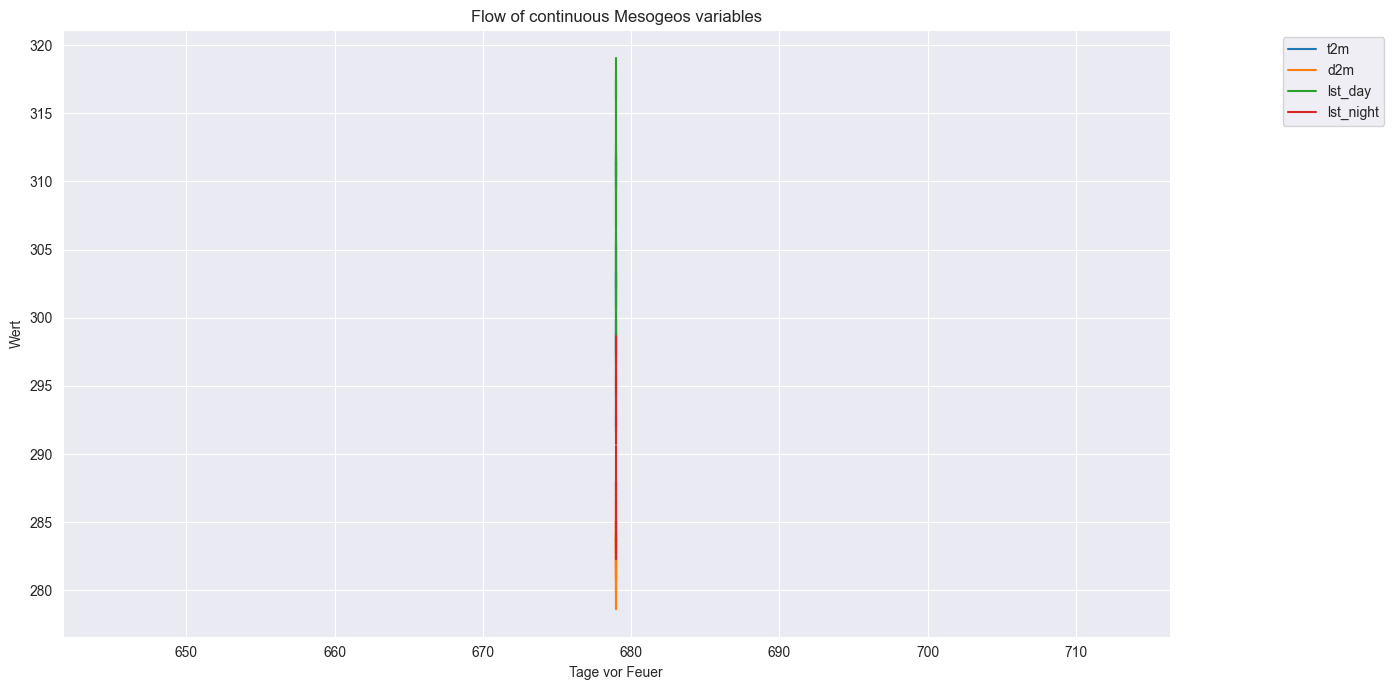

/var/folders/g1/f89bp0710rxg50s3nbjcl19m0000gn/T/ipykernel_87338/3459363603.py:41: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(x_valid, y_valid, deg=1)
/var/folders/g1/f89bp0710rxg50s3nbjcl19m0000gn/T/ipykernel_87338/3459363603.py:41: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(x_valid, y_valid, deg=1)
/var/folders/g1/f89bp0710rxg50s3nbjcl19m0000gn/T/ipykernel_87338/3459363603.py:41: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(x_valid, y_valid, deg=1)
/var/folders/g1/f89bp0710rxg50s3nbjcl19m0000gn/T/ipykernel_87338/3459363603.py:41: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(x_valid, y_valid, deg=1)
/var/folders/g1/f89bp0710rxg50s3nbjcl19m0000gn/T/ipykernel_87338/3459363603.py:41: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(x_valid, y_valid, deg=1)
/var/folders/g1/f89bp0710rxg50s3nbjcl19m0000gn/T/ipykernel_87338/3459363603.py:41: RankWarning: Polyfit may be poor

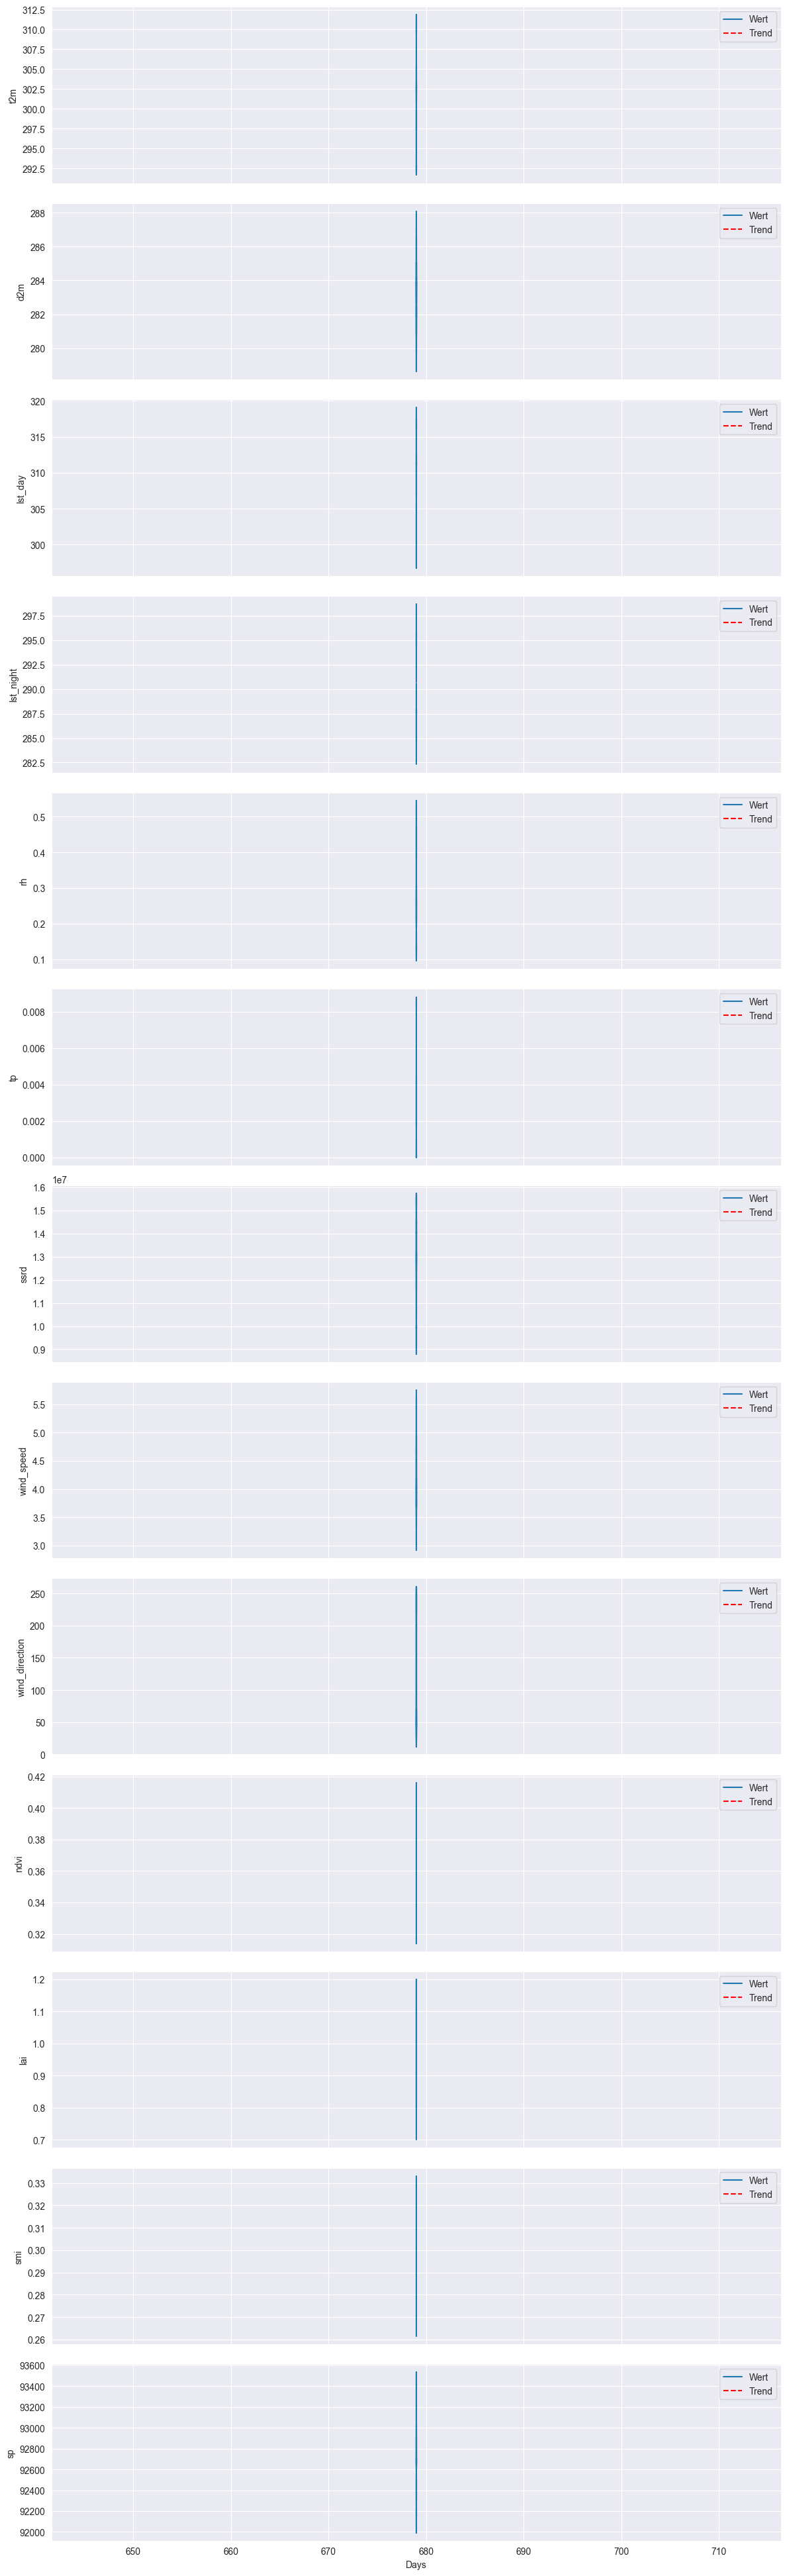

In [17]:
scaled_timeframe = scaled_timeframe(timeframe, continuous_vars_full)
lineplot_timeframe(timeframe, continuous_vars_temp)
lineplot_separat(timeframe, continuous_vars_full)